In [299]:
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
df_original = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [301]:
df_original.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [302]:
df_original.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [303]:
original_cols = df_original.columns.values
original_cols

array(['engine_displacement', 'num_cylinders', 'horsepower',
       'vehicle_weight', 'acceleration', 'model_year', 'origin',
       'fuel_type', 'drivetrain', 'num_doors', 'fuel_efficiency_mpg'],
      dtype=object)

In [311]:
base_columns = ['engine_displacement',
'horsepower',
'vehicle_weight',
'fuel_efficiency_mpg']          

df_base = df_original[base_columns]
df_base['age'] = 2023 - df_original['model_year']
base_columns = base_columns + ['age']
df_base.head()

/tmp/ipykernel_10204/2546221191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['age'] = 2023 - df_original['model_year']


,engine_displacement,horsepower,vehicle_weight,fuel_efficiency_mpg,age
0,170,159.0,3413.433759,13.231729,20
1,130,97.0,3149.664934,13.688217,16
2,170,78.0,3079.038997,14.246341,5
3,220,NaN,2542.392402,16.912736,14
4,210,140.0,3460.870990,12.488369,14


In [297]:
for col in base_columns:
    print(col)
    print(df_base[col].unique()[:5])
    print(df_base[col].nunique())
    print()

print(df_base['model_year'].min())
print(df_base['model_year'].max())

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704

2000
2023


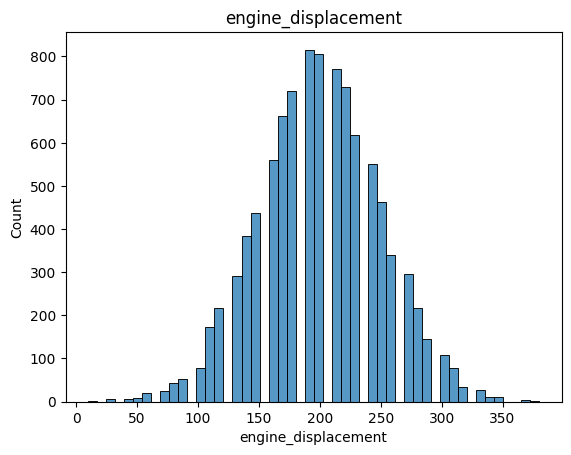

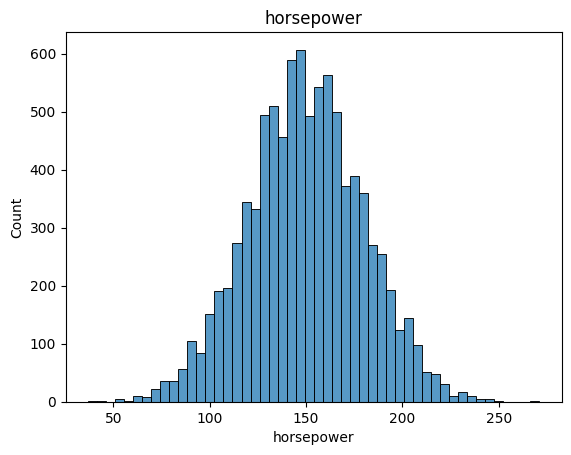

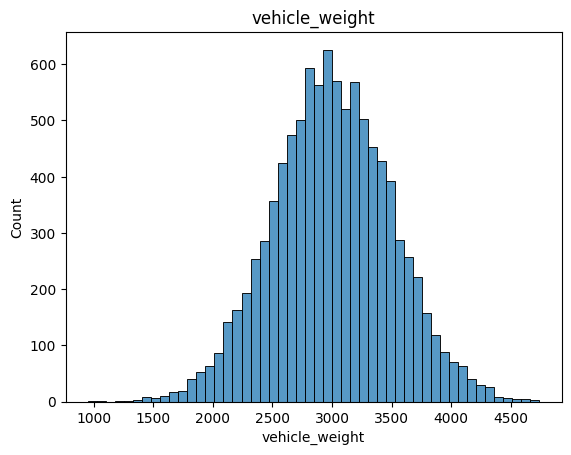

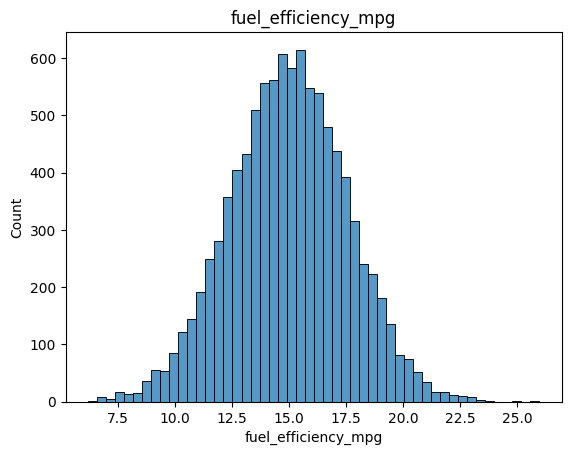

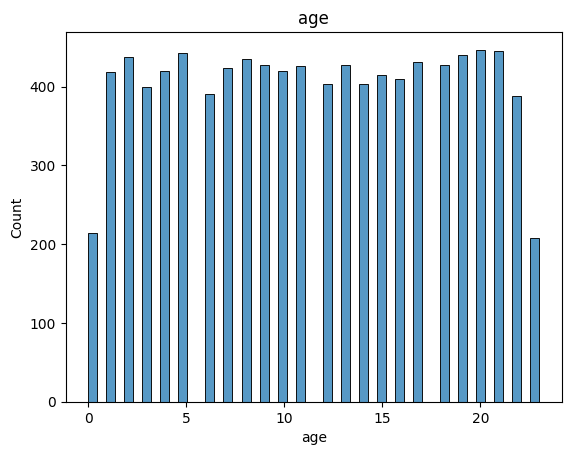

In [312]:
import matplotlib.pyplot as plt
for col in base_columns:
    df_col = df_base[col]
    # sns.histplot(df_fuel_e_mpg, bins = 50)
    sns.histplot(data=df_col, bins = 50)
    plt.title(col)
    plt.show()

In [313]:
# There's one column with missing values. What is it?
df_base.isnull().sum()

# horsepower
df_base['horsepower'].median()

np.float64(149.0)

In [314]:
df_base.isnull().sum()
# df_original.shape

engine_displacement      0
horsepower             708
vehicle_weight           0
fuel_efficiency_mpg      0
age                      0
dtype: int64

# Prepare and split the dataset

In [315]:
n = len(df_base)
n

9704

In [316]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)

1940 1940 5824


In [336]:
def shuffle_idx_and_prep_datasets(seed_val):
    shuffled_idx = np.arange(n)
    print('seed', seed_val)
    np.random.seed(seed_val)
    np.random.shuffle(shuffled_idx)

    df_train = df_base.iloc[shuffled_idx[ : n_train]]
    df_val = df_base.iloc[shuffled_idx[n_train : n_train + n_val]]
    df_test = df_base.iloc[shuffled_idx[n_train + n_val:]]
        
    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # extract output vector
    y_train = (df_train.fuel_efficiency_mpg.values)
    y_val = (df_val.fuel_efficiency_mpg.values)
    y_test = (df_test.fuel_efficiency_mpg.values)

    # IMP: delete output from feature matrix
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    print(len(y_train))
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [337]:
df_train, df_val, df_test, y_train, y_val, y_test = shuffle_idx_and_prep_datasets(42)
df_train

seed 42
5824


,engine_displacement,horsepower,vehicle_weight,age
0,220,144.0,2535.887591,14
1,160,141.0,2741.170484,4
2,230,155.0,2471.880237,6
3,150,206.0,3748.164469,8
4,300,111.0,2135.716359,17
...,...,...,...,...
5819,260,139.0,2606.972984,14
5820,280,132.0,4004.214323,9
5821,210,152.0,2500.175687,3
5822,250,154.0,2254.313245,21


In [338]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [339]:
def train_linear_regression_without_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [340]:
# mean
val_to_fill = df_train['horsepower'].mean()
print(val_to_fill)

# df_train['horsepower'].fillna(val_to_fill, inplace=True)
# df_train.isnull().sum()

# df_train
# df_train.isnull().sum() 429
# df_val.isnull().sum() 136
# df_test.isnull().sum() 143

149.54476367006487


In [341]:
def prepare_X(df, val):
    # print(df.isnull().sum())
    df_fill = df.fillna(val)
    # print(df_fill.isnull().sum())
    X = df_fill.values
    return X

# 0
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_without_reg(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)


np.float64(0.52)

In [342]:
# mean
print(val_to_fill)
X_train = prepare_X(df_train, val_to_fill)
w0, w = train_linear_regression_without_reg(X_train, y_train)

X_val = prepare_X(df_val, val_to_fill)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)


# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
# print(vif)

149.54476367006487


np.float64(0.46)

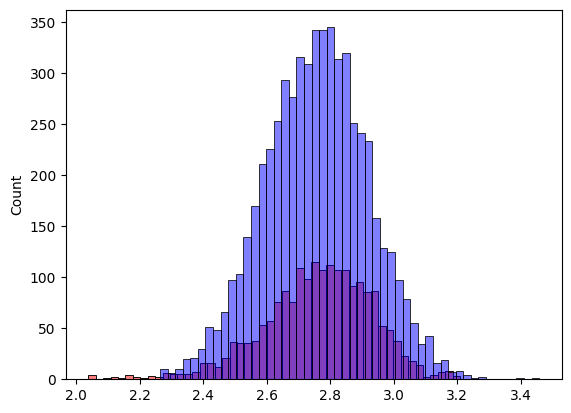

In [164]:
sns.histplot(y_val, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_pred_mean, color = 'blue', alpha = 0.5, bins = 50)
%matplotlib inline

REGULARISED REGRESSION


In [343]:
def train_linear_regression_reg(X, y, r=0.001):
    print('r', r)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [344]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # 0
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(rmse(y_val, y_pred).round(2))
    print("----")

r 0
0.52
----
r 0.01
0.52
----
r 0.1
0.52
----
r 1
0.52
----
r 5
0.55
----
r 10
0.64
----
r 100
2.06
----


In [345]:
list_rmse = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print('s', s)
    df_train, df_val, df_test, y_train, y_val, y_test = shuffle_idx_and_prep_datasets(s)

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_without_reg(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(rmse(y_val, y_pred))
    print("---")
    list_rmse.append(rmse(y_val, y_pred))

s 0
seed 0
5824
0.5206531296298024
---
s 1
seed 1
5824
0.5213388912856988
---
s 2
seed 2
5824
0.5228069974802021
---
s 3
seed 3
5824
0.5159516741173531
---
s 4
seed 4
5824
0.5109129460065376
---
s 5
seed 5
5824
0.5283406460165985
---
s 6
seed 6
5824
0.5313910658170704
---
s 7
seed 7
5824
0.5090670387374364
---
s 8
seed 8
5824
0.5147399129350915
---
s 9
seed 9
5824
0.5131865908331025
---


In [346]:
np.std(list_rmse).round(3)

np.float64(0.007)

In [234]:
# eval on test

In [347]:
final_seed = 9
df_train, df_val, df_test, y_train, y_val, y_test = shuffle_idx_and_prep_datasets(final_seed)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train, 0)

y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

seed 9
5824
r 0.001


In [348]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5156120466461953)